In [34]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [263]:
#Figura 7.1 para binários

#Exemplo, Substância A e Substância B

#Correlações para pressão de saturação

def calc_Psat(T):
    Psat0 = 10**( 4.02291 - 1452.711/(T-42.619)) #P in bar T in K
    Psat1 = 10**( 3.01722 - 1312.472/(T-51.119))
    return Psat0, Psat1

#Margules de dois sufixos
def calc_gamma(x):
    a12 = 1.235
    a21 = 0.518
    
    gamma0 = np.exp((a12 + 2*(a21-a12)*(x[0]))*(x[1]**2))
    gamma1 = np.exp((a21 + 2*(a12-a21)*(x[1]))*(x[0]**2))
    return gamma0, gamma1

In [264]:
#Figura 7.1a

def P_bol(T,x):

    #Etapa 1 - Estimativa Inicial de Pressão de bolha
    Psat = calc_Psat(T)
    gamma = calc_gamma(x)
    
    P=0
    for i in range(len(x)):
        P += x[i]*Psat[i]*gamma[i]
        
    #Etapa 2 - Cálculo de y
    y = np.zeros(len(x))
    y[:] = x[:]*Psat[:]*gamma[:]/P

    return P, y

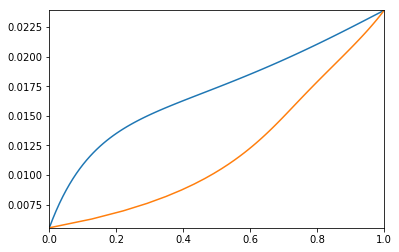

In [272]:
#Gráfico P contra z a T constante
import numpy as np


T = 300#K

x_ = np.linspace(0,1,100)
x__ = 1 - x_

xf_ = np.concatenate((np.array([x_]).T,np.array([x__]).T),axis=1)

P_axis1 = np.zeros(100)
y_axis1 = np.zeros([100,2])

for i in range(0,100):
     P_axis1[i], y_axis1[i] = P_bol(T, xf_[i,:])

plt.plot(x_,P_axis1)
plt.plot(y_axis1[:,0],P_axis1)
plt.xlim(0,1)
Psat_lim = calc_Psat(T)
plt.ylim(min(Psat_lim),max(Psat_lim))

plt.show()